# 0. Goals: Classification





In [2]:
# Importing libraries
import pandas as pd
import numpy as np

from datetime import datetime

# Importing libraries for reading dataset
import io

# Importing libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Importing libraries for Preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Importing libraries for Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Importing libraries for Evaluation
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Uploading csv files into google colab
from google.colab import files
uploaded = files.upload()

Saving air_bnb.csv to air_bnb.csv


In [0]:
# storing dataset to dataframe df
df = pd.read_csv(io.BytesIO(uploaded['air_bnb.csv']))
# Dataset is now stored in a Pandas Dataframe

# 1. Exploratory Data Analysis


## Data Exploration

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


### Variable identification

In [8]:
# Columns explaination
df.columns
# columns                             : 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
#                                       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
#                                       'minimum_nights', 'number_of_reviews', 'last_review',
#                                       'reviews_per_month', 'calculated_host_listings_count',
#                                       'availability_365'
# -------------------------------------------------------------------------------------------------------------------------------------
# id                                  : id of the listing, represented by int64, each id is unique
# name                                : name of the listing, represented by a string, has 59 null values
# host_id                             : id of the owner, represented by int64 there are 19180 host_id in 22552 data
# host_name                           : name of the owner, represented by a string, has 29 null values
# neighbourhood_group                 : Group of neighbourhood in Berlin. Represented by 12 categorical feature represented by 
#                                       Friedrichshain-Kreuzberg    5497
#                                       Mitte                       4631
#                                       Pankow                      3541
#                                       Neukölln                    3499
#                                       Charlottenburg-Wilm.        1592
#                                       Tempelhof - Schöneberg      1560
#                                       Lichtenberg                  688
#                                       Treptow - Köpenick           595
#                                       Steglitz - Zehlendorf        437
#                                       Reinickendorf                247
#                                       Marzahn - Hellersdorf        141
#                                       Spandau                      124
# neighbourhood                       : neighbourhood names. Represented by 136 unique categorical feature 
# latitude                            : Latitude of the listings. Unique set of float64
# longitude                           : Longitude of the listings. Unique set of float64
# room_type                           : Types of room in the listing. Categorical feature represented by 3 groups 'Entire home/apt', 'Private room', 'Shared room'
# price                               : Prices of the listing. 295 prices represented by int64
# minimum_nights                      : The minimum amount of nights to stay in the listing. 102 unique int64
# number_of_reviews                   : Number of review in the listing. 306 unique int64
# last_review                         : Last recorded review date of the listing1313 different dates of the last review, contains 3908 NULL Values
# reviews_per_month                   : The average reviews per month of  the listing. 769 unique float64
# calculated_host_listings_count      : The number of listing the host has. 23 unique int64, how many listing a host has.
# availability_365                    : Number of days it is available in a year. 366 unique int64

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

id, name, host_id, host_name will not be used in this experiment

In [0]:
df = df.drop(columns=['id', 'name', 'host_id', 'host_name'])

### Count the number of records

In [10]:
df.shape

(22552, 12)

### Look for Missing Values

In [11]:
df.isnull().sum()

neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3908
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64

There are missing values in last_review and reviews_per month.

In [0]:
missing = df[['number_of_reviews','last_review','reviews_per_month']].copy()

In [13]:
missing.loc[missing['number_of_reviews']==0,:].shape

(3890, 3)

There are 3890 0 values in number of reviews.

In [14]:
missing.loc[((missing['number_of_reviews']==0) & (missing['last_review'].isnull())),:]

,number_of_reviews,last_review,reviews_per_month
7,0,NaN,NaN
44,0,NaN,NaN
47,0,NaN,NaN
166,0,NaN,NaN
171,0,NaN,NaN
...,...,...,...
22547,0,NaN,NaN
22548,0,NaN,NaN
22549,0,NaN,NaN
22550,0,NaN,NaN


There are 3890 rows with 0 values in number_of_reviews and null values in last_review. We can safely assume that these null values are caused by no review of the listing.

In [15]:
missing.loc[((missing['number_of_reviews']==0) & (missing['reviews_per_month'].isnull())),:]

,number_of_reviews,last_review,reviews_per_month
7,0,NaN,NaN
44,0,NaN,NaN
47,0,NaN,NaN
166,0,NaN,NaN
171,0,NaN,NaN
...,...,...,...
22547,0,NaN,NaN
22548,0,NaN,NaN
22549,0,NaN,NaN
22550,0,NaN,NaN


There are 3890 rows with 0 values in number_of_reviews and null values in reviews_per_month. We can safely assume that these null values are caused by no review of the listing.

last_review                       3908
reviews_per_month                 3914

Since last_review has 3908 missing values

3908 - 3890 = 18

it only has 18 missing values

Since reviews_per_month has 3914 missing values

3914 - 3890 = 24

it only has 24 missing values

In [0]:
mean_reviews_per_month = missing['reviews_per_month'].mean()

In [0]:
idx_reviews_per_month =  missing.loc[((missing['number_of_reviews']==0) & (missing['reviews_per_month'].isnull())),:].index

In [18]:
missing['reviews_per_month'][idx_reviews_per_month] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
missing['reviews_per_month'][idx_reviews_per_month]

7        0.0
44       0.0
47       0.0
166      0.0
171      0.0
        ... 
22547    0.0
22548    0.0
22549    0.0
22550    0.0
22551    0.0
Name: reviews_per_month, Length: 3890, dtype: float64

In [20]:
missing['reviews_per_month'].isnull().sum()

24

These missing values will be filled with mean

In [21]:
mean_reviews_per_month

1.1355252709518162

In [0]:
missing['reviews_per_month'] = missing['reviews_per_month'].fillna(mean_reviews_per_month)

In [23]:
missing['reviews_per_month'].isnull().sum()

0

There are no missing values in reviews_per_month

In [0]:
mode_last_review = missing['last_review'].mode()

In [0]:
idx_last_review =  missing.loc[((missing['number_of_reviews']==0) & (missing['last_review'].isnull())),:].index

In [26]:
missing['last_review'][idx_last_review] = '0000/00/00'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
missing['last_review'][idx_last_review]

7        0000/00/00
44       0000/00/00
47       0000/00/00
166      0000/00/00
171      0000/00/00
            ...    
22547    0000/00/00
22548    0000/00/00
22549    0000/00/00
22550    0000/00/00
22551    0000/00/00
Name: last_review, Length: 3890, dtype: object

In [28]:
missing['last_review'].isnull().sum()

18

These missing values will be filled with mode

In [29]:
mode_last_review[0]

'2018-11-04'

In [0]:
missing['last_review'] = missing['last_review'].fillna(value=mode_last_review[0])

In [31]:
missing['last_review'].isnull().sum()

0

In [0]:
df[['last_review','reviews_per_month']] = missing[['last_review','reviews_per_month']]

In [33]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Verify the distribution of each

In [34]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000
mean,52.509824,13.406107,67.143668,7.157059,17.840679,0.939658,1.918233,79.852829
std,0.030825,0.057964,220.266210,40.665073,36.769624,1.435668,3.667257,119.368162
min,52.345803,13.103557,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,52.489065,13.375411,30.000000,2.000000,1.000000,0.060000,1.000000,0.000000
50%,52.509079,13.416779,45.000000,2.000000,5.000000,0.340000,1.000000,4.000000
75%,52.532669,13.439259,70.000000,4.000000,16.000000,1.180000,1.000000,129.000000
max,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


### Search for outliers

In [35]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

latitude

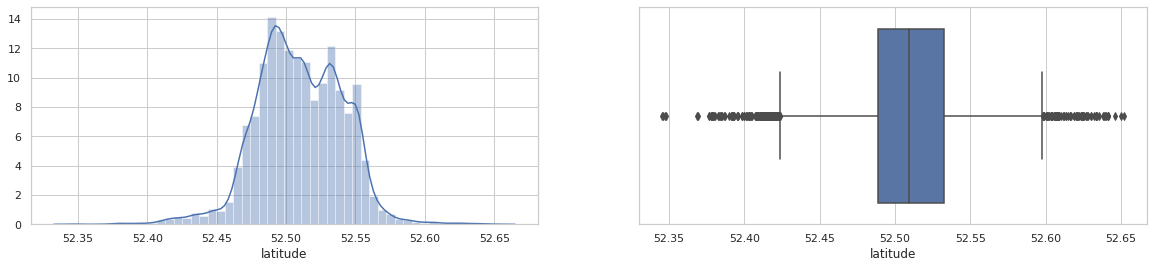

In [36]:
# latitude
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['latitude'])
f.add_subplot(1,2,2)
sns.boxplot(df['latitude'])

longitude

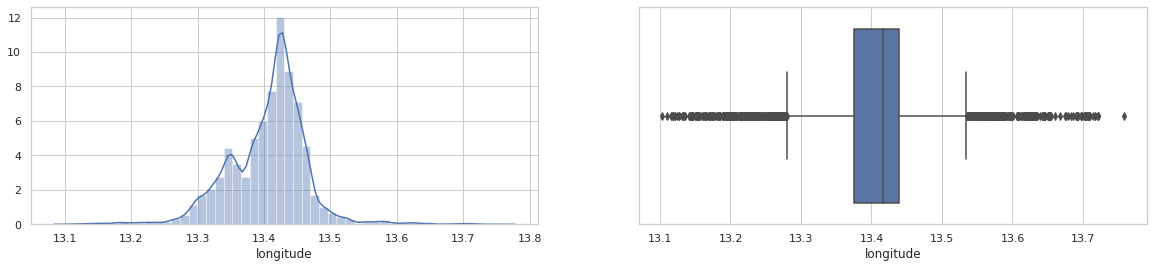

In [37]:
# longitude
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['longitude'])
f.add_subplot(1,2,2)
sns.boxplot(df['longitude'])

price

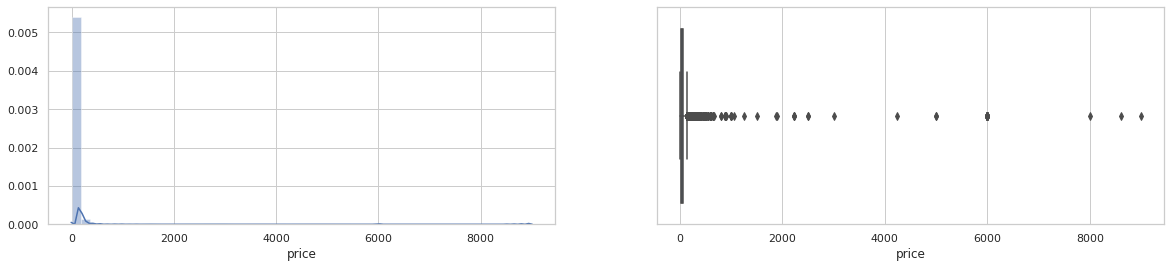

In [38]:
# price
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['price'])
f.add_subplot(1,2,2)
sns.boxplot(df['price'])

minimum_nights

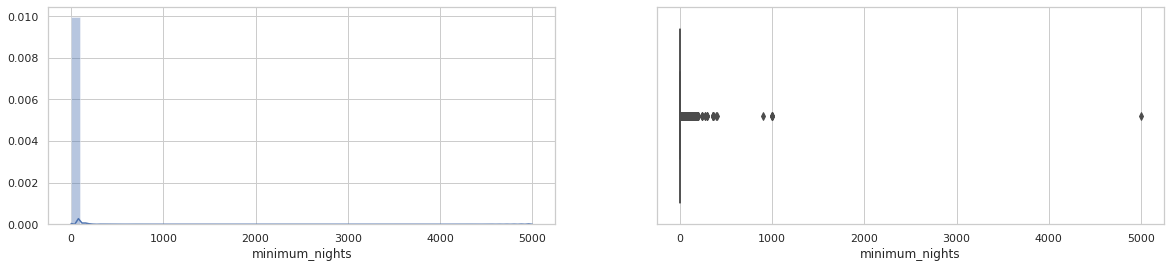

In [39]:
# minimum_nights
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['minimum_nights'])
f.add_subplot(1,2,2)
sns.boxplot(df['minimum_nights'])

number_of_reviews

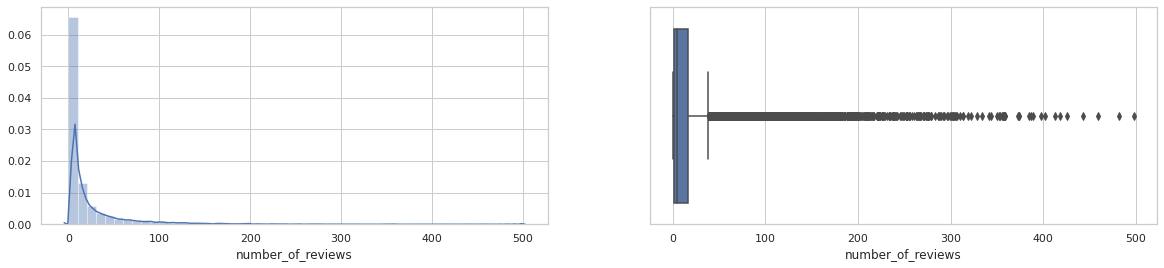

In [40]:
# number_of_reviews
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['number_of_reviews'])
f.add_subplot(1,2,2)
sns.boxplot(df['number_of_reviews'])

reviews_per_month

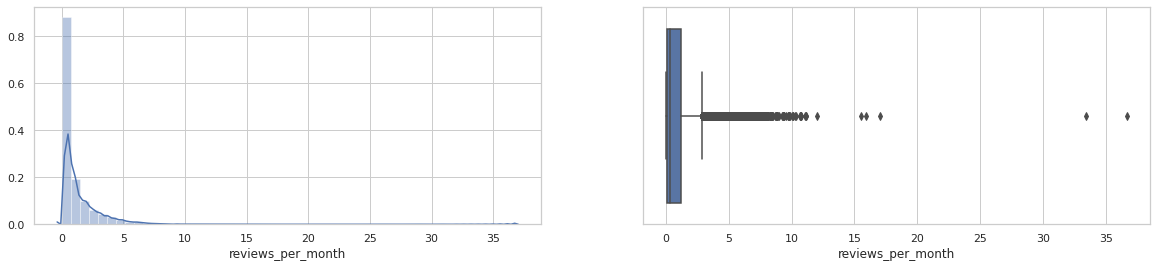

In [41]:
# reviews_per_month
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['reviews_per_month'])
f.add_subplot(1,2,2)
sns.boxplot(df['reviews_per_month'])

calculated_host_listings_count

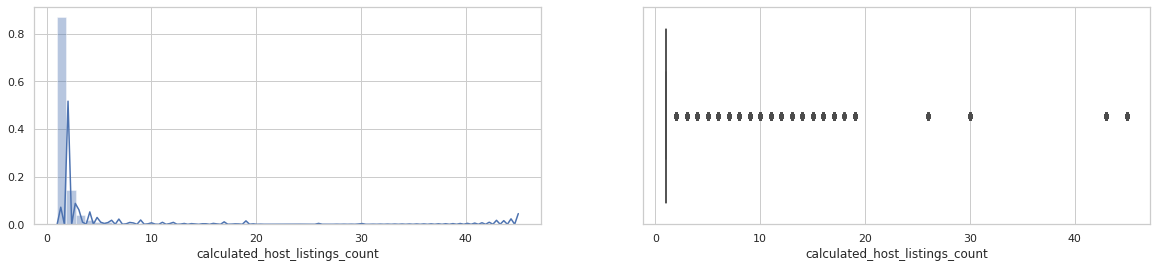

In [42]:
# calculated_host_listings_count
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['calculated_host_listings_count'])
f.add_subplot(1,2,2)
sns.boxplot(df['calculated_host_listings_count'])

availability_365

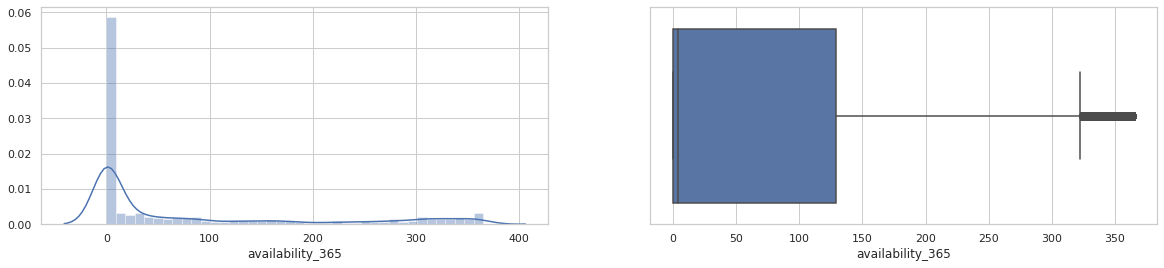

In [43]:
# availability_365
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['availability_365'])
f.add_subplot(1,2,2)
sns.boxplot(df['availability_365'])

### Correlation

In [0]:
data = df.copy()

In [0]:
cols_cat = data.loc[:,(data.dtypes=='object')].columns

In [0]:
data[cols_cat] = data[cols_cat].apply(LabelEncoder().fit_transform)

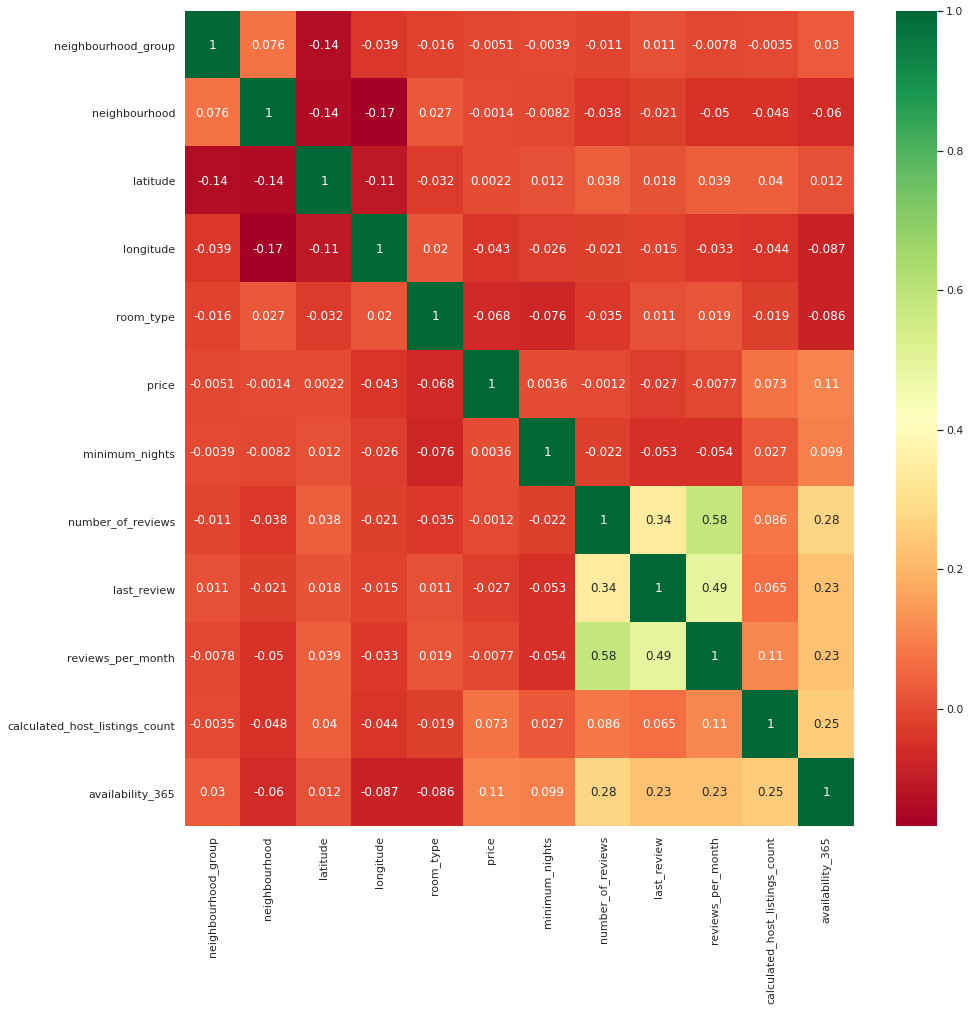

In [47]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Feature Selection

Considering that last_review and review_per_month, then we could use any. and since reviews_per_month has high correlation with number_of_reviews, we could use number_of_reviews to represent both of the features. This is done to prevent noise from the missing values in last_review and reviews_per_month.

In [0]:
df = df.drop(columns=['last_review','reviews_per_month'])

longitude and latitude will not be considered a good metrics to predict room_type. It will be dropped

In [0]:
df = df.drop(columns=['longitude','latitude'])

### Split Data

In [50]:
df

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Mitte,Brunnenstr. Süd,Entire home/apt,60,4,118,4,141
1,Pankow,Prenzlauer Berg Nordwest,Private room,17,2,6,1,0
2,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,62,143,1,220
3,Tempelhof - Schöneberg,Schöneberg-Nord,Private room,26,5,25,1,297
4,Pankow,Helmholtzplatz,Private room,42,2,197,1,26
...,...,...,...,...,...,...,...,...
22547,Mitte,Brunnenstr. Süd,Entire home/apt,60,2,0,1,314
22548,Tempelhof - Schöneberg,Schöneberg-Nord,Shared room,20,1,0,6,78
22549,Pankow,Prenzlauer Berg Südwest,Entire home/apt,85,3,0,2,15
22550,Mitte,Alexanderplatz,Private room,99,1,0,3,6


Categorical Data

In [0]:
df_split = df.copy()

In [0]:
cols_cat = df_split.loc[:,(df_split.dtypes=='object')].columns

In [53]:
cols_cat

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

In [0]:
df_cat = df_split[cols_cat]

In [55]:
df_cat

,neighbourhood_group,neighbourhood,room_type
0,Mitte,Brunnenstr. Süd,Entire home/apt
1,Pankow,Prenzlauer Berg Nordwest,Private room
2,Pankow,Prenzlauer Berg Südwest,Entire home/apt
3,Tempelhof - Schöneberg,Schöneberg-Nord,Private room
4,Pankow,Helmholtzplatz,Private room
...,...,...,...
22547,Mitte,Brunnenstr. Süd,Entire home/apt
22548,Tempelhof - Schöneberg,Schöneberg-Nord,Shared room
22549,Pankow,Prenzlauer Berg Südwest,Entire home/apt
22550,Mitte,Alexanderplatz,Private room


In [0]:
df_cat = df_cat.apply(LabelEncoder().fit_transform)

In [57]:
df_cat

,neighbourhood_group,neighbourhood,room_type
0,4,18,0
1,6,95,1
2,6,98,0
3,10,110,1
4,6,49,1
...,...,...,...
22547,4,18,0
22548,10,110,2
22549,6,98,0
22550,4,2,1


In [0]:
cols_disc = df_split.loc[:,(df_split.dtypes!='object')].columns

In [59]:
cols_disc

Index(['price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [0]:
df_disc = df_split[cols_disc]

In [61]:
df_disc

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,60,4,118,4,141
1,17,2,6,1,0
2,90,62,143,1,220
3,26,5,25,1,297
4,42,2,197,1,26
...,...,...,...,...,...
22547,60,2,0,1,314
22548,20,1,0,6,78
22549,85,3,0,2,15
22550,99,1,0,3,6


Since every label has outliers it will be scaled accordingly

In [62]:
df_disc['price'] = StandardScaler().fit_transform(df_disc['price'].values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
df_disc['minimum_nights'] = StandardScaler().fit_transform(df_disc['minimum_nights'].values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
df_disc['number_of_reviews'] = StandardScaler().fit_transform(df_disc['number_of_reviews'].values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df_disc['calculated_host_listings_count'] = StandardScaler().fit_transform(df_disc['calculated_host_listings_count'].values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
df_disc['availability_365'] = StandardScaler().fit_transform(df_disc['availability_365'].values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
df_disc

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,-0.032433,-0.077637,2.724030,0.567676,0.512268
1,-0.227655,-0.126821,-0.322031,-0.250393,-0.668977
2,0.103769,1.348680,3.403954,-0.250393,1.174101
3,-0.186795,-0.053046,0.194712,-0.250393,1.819178
4,-0.114154,-0.126821,4.872590,-0.250393,-0.451159
...,...,...,...,...,...
22547,-0.032433,-0.126821,-0.485212,-0.250393,1.961598
22548,-0.214035,-0.151412,-0.485212,1.113055,-0.015522
22549,0.081069,-0.102229,-0.485212,0.022297,-0.543313
22550,0.144630,-0.151412,-0.485212,0.294986,-0.618712


In [68]:
df_split[cols_cat] = df_cat
df_split[cols_disc] = df_disc
df_split

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,4,18,0,-0.032433,-0.077637,2.724030,0.567676,0.512268
1,6,95,1,-0.227655,-0.126821,-0.322031,-0.250393,-0.668977
2,6,98,0,0.103769,1.348680,3.403954,-0.250393,1.174101
3,10,110,1,-0.186795,-0.053046,0.194712,-0.250393,1.819178
4,6,49,1,-0.114154,-0.126821,4.872590,-0.250393,-0.451159
...,...,...,...,...,...,...,...,...
22547,4,18,0,-0.032433,-0.126821,-0.485212,-0.250393,1.961598
22548,10,110,2,-0.214035,-0.151412,-0.485212,1.113055,-0.015522
22549,6,98,0,0.081069,-0.102229,-0.485212,0.022297,-0.543313
22550,4,2,1,0.144630,-0.151412,-0.485212,0.294986,-0.618712


# 1. KNN
In this model the selected features are:
1.   neighbourhood_group
2.   neighbourhood
3.   calculated_host_listings_count 
4.   price
5.   minimum_nights
6.   number_of_reviews
7.   availability_365

The target is:
- room_type



From Problem to ML Solution
1. Articulate Your Problem Clearly

The problem is a 3-class, single-label classification, which predicts whether the room_type of the listing is one of the three classes ('Entire home/apt', 'Private room', 'Shared room'). In this experiment we will use KNN as a prediction algorithm


2. Identify Your Data Sources

In this experiment we will use 22552 labeled data. The decision here is to find out the trend between room_type in the dataset. So here we want to classify which are categorized as such

3. Identify Potential Learning Problems

The potential learning problems are:
- The dataset is unbalanced between room_type

Private room       0.511440

Entire home/apt    0.475435

Shared room        0.013125

- The features are noisy and has outliers


4. Think About Potential Bias and Ethics

The writer thinks that there are no Bias and Ethics concerns in this experiment

In [0]:
# Get the prepared dataframe to df_knn
df_knn = df_split.copy()

In [0]:
# Split the data to Features and labels
data = df_knn
X = data.drop(columns='room_type').values   #independent columns
y = data['room_type'].values                #target column i.e price range

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

Iterating through number of neighbours to find the optimum number

In [0]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

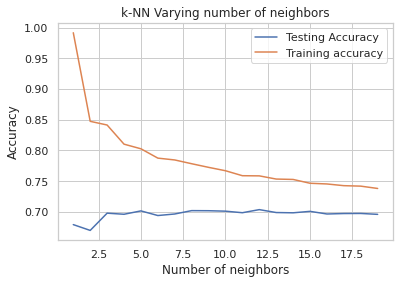

In [72]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [0]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=12)

In [74]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [75]:
# Get accuracy
knn.score(X_test,y_test)

0.7036653857522909

In [76]:
# Getting the prediction from the fitted model
y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[2245,  971,    1],
       [ 959, 2496,    5],
       [  26,   43,   20]])

## Evaluation

In [77]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,2245,971,1,3217
1,959,2496,5,3460
2,26,43,20,89
All,3230,3510,26,6766


In [78]:
# Print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      3217
           1       0.71      0.72      0.72      3460
           2       0.77      0.22      0.35        89

    accuracy                           0.70      6766
   macro avg       0.73      0.55      0.59      6766
weighted avg       0.70      0.70      0.70      6766



## Model Tuning

### Feature Selection

In [0]:
# Find the best set of features

data = df_knn[['price','minimum_nights','availability_365','number_of_reviews','room_type']].copy()
X = data[['price','minimum_nights','availability_365','number_of_reviews']].values  #independent columns
y = data['room_type'].values    #target column i.e price range

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

Iterating through number of neighbours to find the optimum number

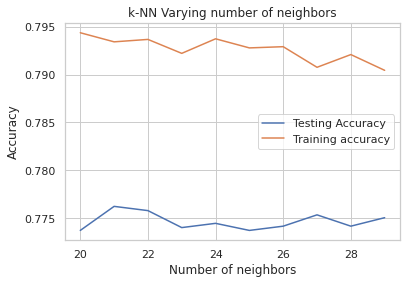

In [80]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(20,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)


#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [81]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=21)

# Fit the model
knn.fit(X_train,y_train)

# Get accuracy
knn.score(X_test,y_test)

0.7762341117351463

Through intuition and iteration, the best features are:
- price
- minimum_nights
- availability_365
- number_of_reviews

The best k is 21

The score is 0.7762341117351463

In [0]:
# to_csv

# data.to_csv('df_knn.csv')

In [0]:
# find the best parameters for KNN using GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 29


Best leaf_size: 1

Best p: 1

Best n_neighbors: 29

In [0]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=29, leaf_size=1 , p=1)

#Fit the model
knn.fit(X_train,y_train)

#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7778598876736624

Score is 0.7778598876736624

## 2. Random Forest

In this model the selected features are:
1.   neighbourhood_group
2.   neighbourhood
3.   calculated_host_listings_count 
4.   price
5.   minimum_nights
6.   number_of_reviews
7.   availability_365

The target is:
- room_type


From Problem to ML Solution
1. Articulate Your Problem Clearly

The problem is a 3-class, single-label classification, which predicts whether the room_type of the listing is one of the three classes ('Entire home/apt', 'Private room', 'Shared room'). In this experiment we will use Random Forest as a prediction algorithm

2. Identify Your Data Sources

In this experiment we will use 22552 labeled data. The decision here is to find out the trend between room_type in the dataset. So here we want to classify which are categorized as such

3. Identify Potential Learning Problems

The potential learning problems are:
> - The dataset is unbalanced between room_type

> > > Private room       0.511440

> > > Entire home/apt    0.475435

> > > Shared room        0.013125

> - The features are noisy and has outliers


4. Think About Potential Bias and Ethics

The writer thinks that there are no Bias and Ethics concerns in this experiment

In [0]:
df_randomforest = df_split.copy()

In [87]:
df_randomforest

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,4,18,0,-0.032433,-0.077637,2.724030,0.567676,0.512268
1,6,95,1,-0.227655,-0.126821,-0.322031,-0.250393,-0.668977
2,6,98,0,0.103769,1.348680,3.403954,-0.250393,1.174101
3,10,110,1,-0.186795,-0.053046,0.194712,-0.250393,1.819178
4,6,49,1,-0.114154,-0.126821,4.872590,-0.250393,-0.451159
...,...,...,...,...,...,...,...,...
22547,4,18,0,-0.032433,-0.126821,-0.485212,-0.250393,1.961598
22548,10,110,2,-0.214035,-0.151412,-0.485212,1.113055,-0.015522
22549,6,98,0,0.081069,-0.102229,-0.485212,0.022297,-0.543313
22550,4,2,1,0.144630,-0.151412,-0.485212,0.294986,-0.618712


In [0]:
data = df_randomforest.copy()
# Split data to X and y
X = data.drop(columns='room_type').values   #independent columns
y = data['room_type'].values                #target column i.e price range

# Split data to X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [96]:
# Create a model then fit that model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
# Get the score
clf.score(X_test,y_test)

0.7982708933717579

## Evaluation

In [98]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[1727,  417,    1],
       [ 450, 1856,    1],
       [   7,   34,   18]])

In [99]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,1727,417,1,2145
1,450,1856,1,2307
2,7,34,18,59
All,2184,2307,20,4511


In [100]:
# Print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2145
           1       0.80      0.80      0.80      2307
           2       0.90      0.31      0.46        59

    accuracy                           0.80      4511
   macro avg       0.83      0.64      0.69      4511
weighted avg       0.80      0.80      0.80      4511



## Model Tuning

### Feature Selection

In [0]:
# Find the best set of features

data = df_randomforest.copy()
# Split data to X and y
X = data.drop(columns='room_type').values  #independent columns
y = data['room_type'].values    #target column i.e price range

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [0]:
cols = data.drop(columns="room_type").columns

In [103]:
# feature importance

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(cols, clf.feature_importances_):
    print(feature)

('neighbourhood_group', 0.05646414489774886)
('neighbourhood', 0.1211153609964153)
('price', 0.45095894997341174)
('minimum_nights', 0.10502892103493729)
('number_of_reviews', 0.12422958557319166)
('calculated_host_listings_count', 0.03901748226066743)
('availability_365', 0.10318555526362783)


- ('price', 0.3507259662065269)
- ('price/minimum_nights', 0.13970296419067688)
- ('neighbourhood', 0.1185897399069081)
- ('number_of_reviews', 0.11744121248303897)

In [0]:
# Trying to find the best set of features

data = df_randomforest.copy()
# Split data to X and y
X = data.drop(columns='room_type').values  #independent columns
y = data['room_type'].values    #target column i.e price range

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [105]:
# Create and fit the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
# Get the score
clf.score(X_test, y_test)

0.7973691989358558

The features are already optimal. dropping one of the feature resulting decrease in oob scores

In [0]:
# to_csv

# data.to_csv('df_randomForest.csv')

### Hyperparameter Tuning

In [0]:
data = df_randomforest
# Split data to X and y
X = data.drop(columns='room_type').values  #independent columns
y = data['room_type'].values    #target column i.e price range

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [108]:
# Find the best set of parameters using GridSeacrhCV

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=42, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"],"max_depth" : [5,10,15,20], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X, y)


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [110]:
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.7994405256276486
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)


0.7981546518854507

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 16, 'n_estimators': 1000}

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [112]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [113]:
print("%.4f" % rf.oob_score_)

0.8054


In [114]:
# Get the final result
rf.score(X_test, y_test)

0.805793674253621